# Imports

In [29]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz
from sklearn.neighbors import DistanceMetric, KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

# Classificação

## Carregando os dados

In [30]:
Train_Data = pd.read_csv("../../Datasets/heart.csv")
Train_Data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Descrição das colunas

1. __Age__ is the age of candidate.
2. __Sex__ has numeric values. 1 denotes male and 0 denotes female.
3. __Chest Pain__ pain has values between 0-3. The types of angina that are described in the research paper. The higher the number, the lesser are the odds of heart attack.
4. __Resting blood pressure__ is normal pressure with no exercise.
5. __Cholesterol__ means the blockage for blood supply in the blood vessels.
6. __Fasting Blood Pressure__ is blood sugar taken after a long gap between a meal and the test. Typically, it's taken before any meal in the morning. 1 denotes > 120 mg/dl 
7. __Rest ECG (electrocardiographic) results__ means ECG values taken while person is on rest which means no exercise and normal functioning of heart is happening. Values 0,1,2.
8. __The Maximum Heart Rate achieved__.
9. __Exercise induced angina__ is chest pain while exercising or doing any physical activity. 1 denotes presence and 0 denotes absence.
10. __Oldpeak__ = ST Depression induced by exercise relative to rest. ST Depression is the difference between value of ECG at rest and after exercise.
11. __ST Slope__ is the tangent to the depression value.
12. __The number of major blood vessels (0-3) supplying blood to heart blocked__.
13. __The Types of thalassemia__.
14. __Heart attack prediction__ where 1 denotes Heart attack occured and 0 where it din't take occur.

In [31]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Checar se as classes estão balanceadas

In [32]:
Train_Data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

## Checar se existem dados duplicados

In [33]:
print("Duplicated values: ", Train_Data.duplicated().sum())
duplicate = Train_Data[Train_Data.duplicated()]
duplicate

Duplicated values:  1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


### Remover dados duplicados, deixando apenas a primeira ocorrência

In [34]:
Train_Data.drop_duplicates(keep='first',inplace=True) 
Train_Data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Checar se existem dados faltantes

In [35]:
print("Missing values: ", Train_Data.isnull().sum().sum())

Missing values:  0


## Checar se existem correlações entre os atributos e a saída

In [36]:
corr = Train_Data.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


## Dividir atributos e saída

In [37]:
X=Train_Data[Train_Data.columns[Train_Data.columns!='target']]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [38]:
Y=Train_Data['target']

## Separar treinamento e teste

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## Resultados a serem imprimidos

In [40]:
def results(y_test,y_pred):
    results = confusion_matrix(y_test, y_pred)
    print ('Confusion Matrix :')
    print(results)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print ('Report : ')
    print (classification_report(y_test, y_pred))

## Árvore de decisão

In [41]:
def computeClassificationDecisionTree(X_train, X_test, y_train, y_test,printResults):
    
    arvore_classificacao = tree.DecisionTreeClassifier()
    arvore_classificacao.fit(X_train,y_train)
    y_pred = arvore_classificacao.predict(X_test)
    if printResults:
        results(y_test, y_pred)
    return y_pred,arvore_classificacao


In [42]:
y_pred,arvore_classificacao = computeClassificationDecisionTree(X_train, X_test, y_train, y_test, True)

Confusion Matrix :
[[21  6]
 [ 8 26]]
Accuracy: 77.05%
Report : 
              precision    recall  f1-score   support

           0       0.72      0.78      0.75        27
           1       0.81      0.76      0.79        34

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



### Plotando as regras criadas

In [43]:
dot_data = tree.export_graphviz(arvore_classificacao, out_file=None) 

In [44]:
graph = graphviz.Source(dot_data)
graph.render("heart")

'heart.pdf'

In [45]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [46]:
dot_data = tree.export_graphviz(arvore_classificacao, out_file=None, 
                      feature_names=X_train.columns,  
                      class_names=['não infarto','infarto'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)

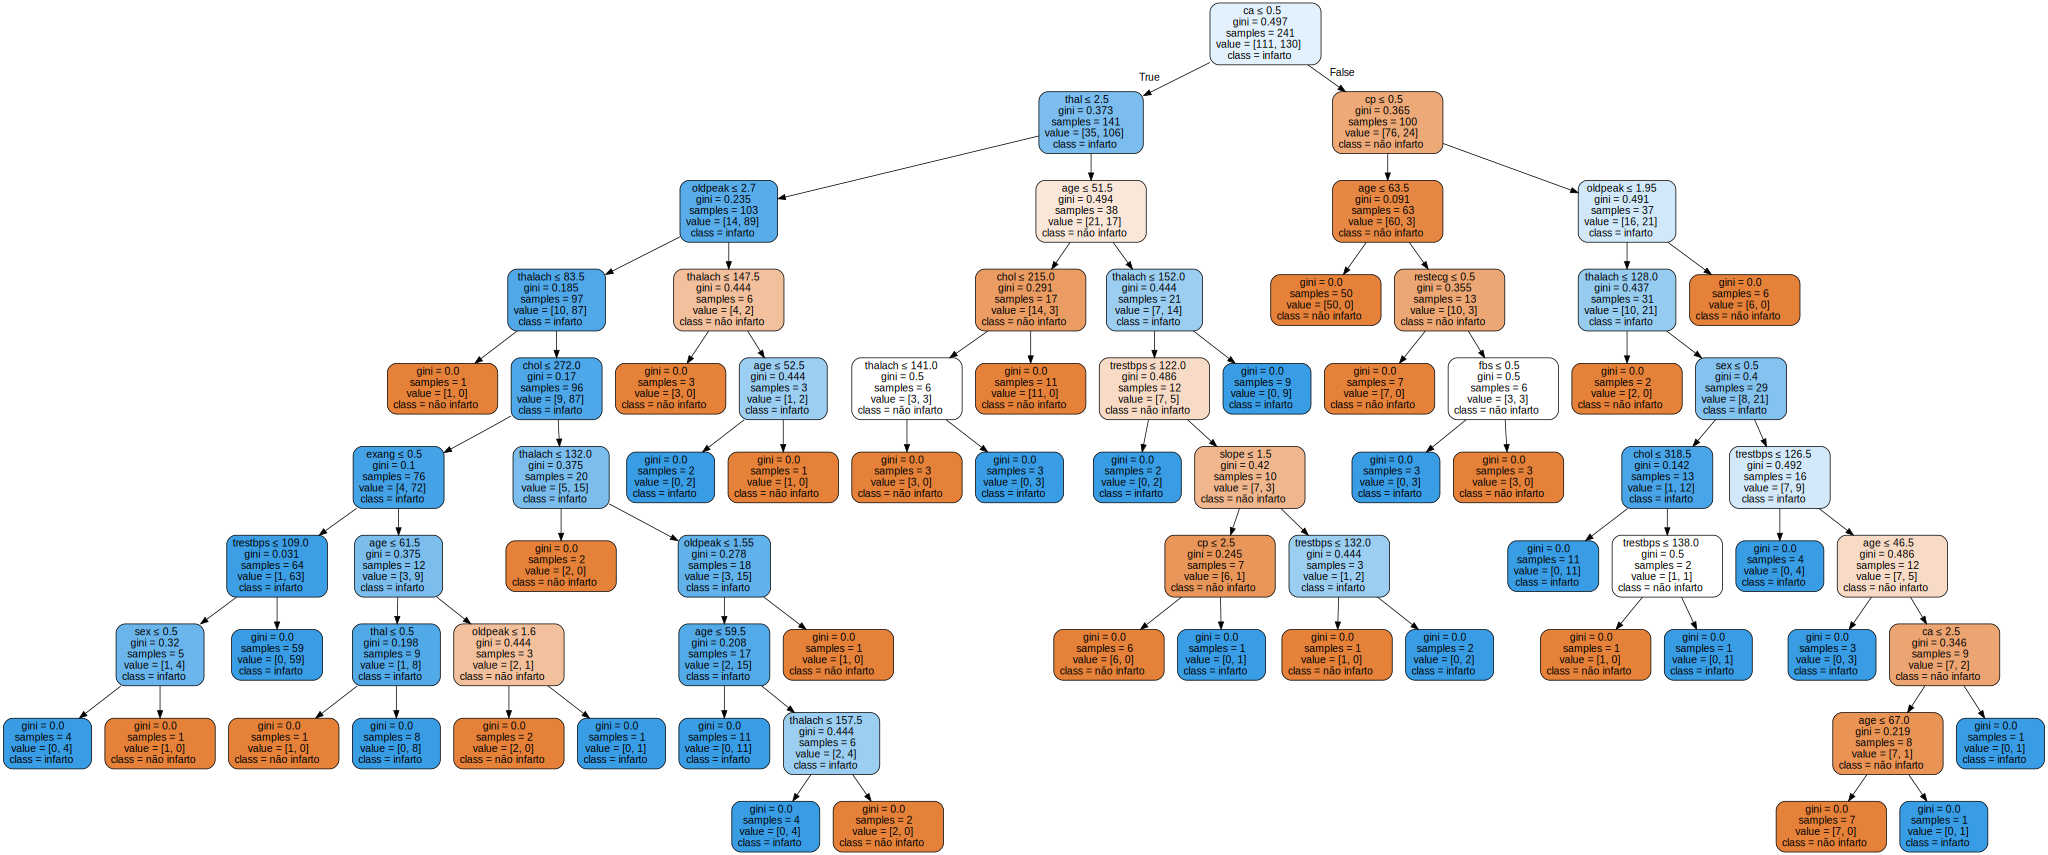

In [47]:
graph

In [48]:
graph.render("heart2")

'heart2.pdf'

## KNN

In [49]:
def compute_knn(X_train, X_test, y_train, y_test, k_neighbors):

    neigh = KNeighborsClassifier(n_neighbors=k_neighbors, metric = 'euclidean', algorithm='auto')
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)

    results(y_test, y_pred)
    
    return y_pred

In [50]:
y_pred = compute_knn(X_train, X_test, y_train, y_test, 3)

Confusion Matrix :
[[13 14]
 [12 22]]
Accuracy: 57.38%
Report : 
              precision    recall  f1-score   support

           0       0.52      0.48      0.50        27
           1       0.61      0.65      0.63        34

    accuracy                           0.57        61
   macro avg       0.57      0.56      0.56        61
weighted avg       0.57      0.57      0.57        61



In [51]:
def error_plot(X_train, X_test, y_train, y_test):

    error = []

    # Calculando o erro variando o k de 1 a 30
    for k in range(1, 30, 2):
        pred_i = compute_knn(X_train, X_test, y_train, y_test, k)
        
        error.append(np.mean(pred_i != y_test))
        
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 30, 2), error, color='red', linestyle='dashed', marker='o',
             markerfacecolor='blue', markersize=10)
    plt.title('Error Rate K Value')
    plt.xlabel('K Value')
    plt.ylabel('Mean Error')

Confusion Matrix :
[[15 12]
 [13 21]]
Accuracy: 59.02%
Report : 
              precision    recall  f1-score   support

           0       0.54      0.56      0.55        27
           1       0.64      0.62      0.63        34

    accuracy                           0.59        61
   macro avg       0.59      0.59      0.59        61
weighted avg       0.59      0.59      0.59        61

Confusion Matrix :
[[13 14]
 [12 22]]
Accuracy: 57.38%
Report : 
              precision    recall  f1-score   support

           0       0.52      0.48      0.50        27
           1       0.61      0.65      0.63        34

    accuracy                           0.57        61
   macro avg       0.57      0.56      0.56        61
weighted avg       0.57      0.57      0.57        61

Confusion Matrix :
[[12 15]
 [10 24]]
Accuracy: 59.02%
Report : 
              precision    recall  f1-score   support

           0       0.55      0.44      0.49        27
           1       0.62      0.71      0.6

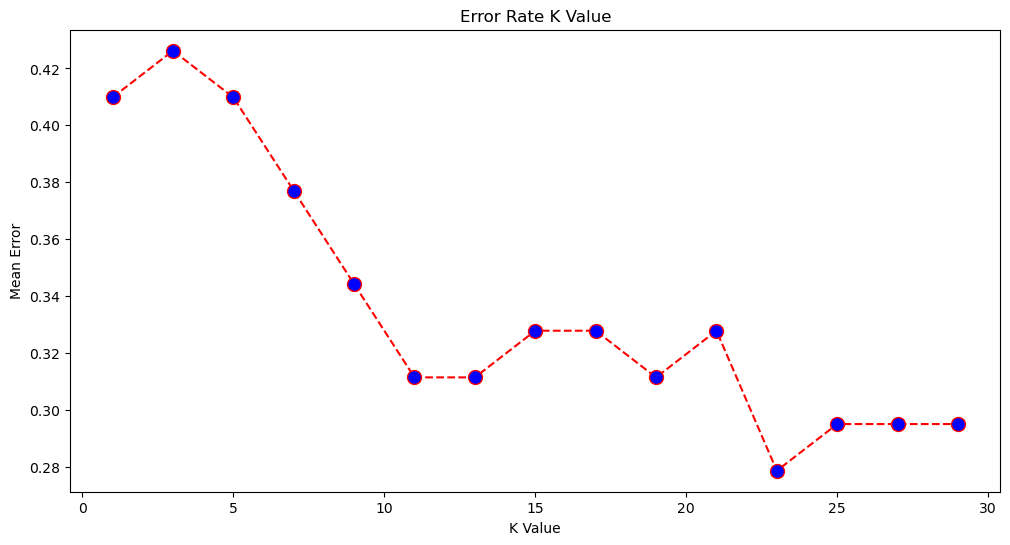

In [52]:
error_plot(X_train, X_test, y_train, y_test)

# KNN com dados normalizados

In [53]:
def compute_knn_normalized(X_train, X_test, y_train, y_test, k_neighbors):

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    neigh = KNeighborsClassifier(n_neighbors=k_neighbors, metric = 'euclidean', algorithm='auto')
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)

    results(y_test, y_pred)
    return y_pred


In [54]:
y_pred = compute_knn_normalized(X_train, X_test, y_train, y_test, 3)

Confusion Matrix :
[[26  1]
 [ 4 30]]
Accuracy: 91.80%
Report : 
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        27
           1       0.97      0.88      0.92        34

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

